> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [324]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
"""
The TMDB movie dataset is selected for this project. This dataset contains information about over 10,000 movies collected from 
The Movie Database (TMDB), including user ratings and revenue. 

Research Questions include: 
1. What genres of movies are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. What is the relationship between user rating and revenue or popularity? 
4. What kinds of properties are associated with movies that are most popular?

"""
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


'\nThe TMDB movie dataset is selected for this project. This dataset contains information about over 10,000 movies collected from \nThe Movie Database (TMDB), including user ratings and revenue. \n\nResearch Questions include: \n1. What genres of movies are most popular from year to year?\n2. What kinds of properties are associated with movies that have high revenues?\n3. What is the relationship between user rating and revenue? \n\n'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
df = pd.read_csv('movies.csv')
#Check the information of dataframe
df.info()
df.isnull().sum().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

True

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [3]:

#Remove missing values 
df = df.dropna()
#Confirm there is no more missing values 
df.isnull().sum().any()
#check information of the dataframe
df.info()
#check first few rows of the dataframe
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#For simplicity purpose, remove columns that won't be needed
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
#confirm that those columns have been removed
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [5]:
#Change release_date dtype into Date
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 15 columns):
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
director                1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 249.0+ KB


In [6]:
#Check for duplication in the dataframe 
sum(df.duplicated())
#replace separator in columns 'cast', 'keywords' and 'genre' with ','
df['cast']=df['cast'].str.replace('|', ' ,')
df['keywords']=df['keywords'].str.replace('|', ' ,')
df['genres']=df['genres'].str.replace('|', ' ,')
df['production_companies']=df['production_companies'].str.replace('|', ' ,')
df['director']=df['director'].str.replace('|', ',')
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt ,Bryce Dallas Howard ,Irrfan Khan ...",Colin Trevorrow,"monster ,dna ,tyrannosaurus rex ,velociraptor ...",Twenty-two years after the events of Jurassic ...,124,"Action ,Adventure ,Science Fiction ,Thriller","Universal Studios ,Amblin Entertainment ,Legen...",2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What genres of movies are most popular from year to year?
Reasoning for this analysis: 
Understand this trend can help understand the change of movie industry as well as the movie genre preferences among movie fans. 

Observation made via analysis: 
The movie with highest popularity overtime (from 1961 to 2015) was Jurassic World, with a popularity of 32.985763. Overtime, the most popular movie genre is Adventure followed by Action, and Drama. 

Counter({'Adventure': 21, 'Action': 9, 'Drama': 7, 'Horror': 4, 'Science': 3, 'Fiction': 3, 'Animation': 2, 'Comedy': 2, 'Fantasy': 1, 'Mystery': 1, 'Crime': 1, 'Family': 1, 'Romance': 1})


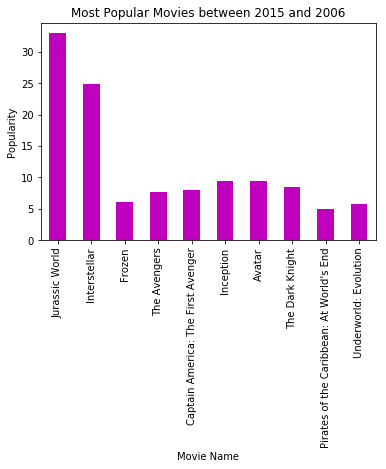

0                                 Jurassic World
629                                 Interstellar
5422                                      Frozen
4361                                The Avengers
3372          Captain America: The First Avenger
1919                                   Inception
1386                                      Avatar
2875                             The Dark Knight
7387    Pirates of the Caribbean: At World's End
6554                       Underworld: Evolution
Name: original_title, dtype: object

In [7]:
from collections import Counter
from itertools import chain
#create a new dataframe by selecting target columns: popularity, release_year, genres, revenue 
df1=df.loc[:, ['popularity', 'release_year', 'release_date','genres', 'original_title']]
#sort dataframe by popularity and remove duplicate years 
df2=df1.sort_values('popularity', ascending=False).drop_duplicates(['release_year'])
#sort dataframe by release_year
df2=df2.sort_values('release_year', ascending=False)
df2.head()
#convert column 'genres' into a list 
g_list = df2['genres'].tolist()
g_list = [elem.strip().split(',') for elem in g_list]
genres = [i[0].split() for i in g_list]
print (Counter(chain.from_iterable(genres)))

df2['popularity'][:10].plot(kind='bar', color='m')
labels=['Jurassic World', 'Interstellar', 'Frozen', 'The Avengers', 'Captain America: The First Avenger', 'Inception', 'Avatar', 'The Dark Knight', 'Pirates of the Caribbean: At World\'s End', 'Underworld: Evolution']
x=[0,1,2,3,4,5,6,7,8,9]
plt.xticks(x, labels, rotation='vertical')
plt.title('Most Popular Movies between 2015 and 2006')
plt.xlabel('Movie Name')
plt.ylabel('Popularity')
plt.show()

df2['original_title'][:10]

### Research Question 2: What kinds of properties are associated with movies that have high revenues?
Reasoning for the analysis: To understand how can the movie industry increase the potential revenues. 

Observations:
Movies with high revenues have the following properties or correlations: 
1. Invest similar amount of budget as that of expected revenue or more 
2. Be these movie genres (in descending order): drama, commedy, thriller, action, and adventure
3. Featured casts that could bring high revenues (in descending order): Tom Hanks, Matt Damon, Mark Wahlberg, Nicolas Cage, Johnny Depp, Tom Cruise, George Clooney
4. Directored by award-winning movie directors: John Carpenter, Steven Spielberg, Steven Soderbergh
5. Movie is based on novel could yiel high revenues, as well as settings (in descending order) of the story are in London, New York and Paris. Interestingly, movie on suicide also yield high revenues second to based on novel. 
6. Movies released in the fall (in descending order): September, October and December tend to yield high revenues

In [8]:
#Subset dataframe to only contain target columns 
df3=df.loc[:, ['genres', 'original_title', 'keywords', 'revenue', 'budget', 'cast', 'director', 'runtime']]
#sort dataframe by popularity and remove duplicate years 
df3=df3.sort_values('revenue', ascending=False)
df3.head()


,genres,original_title,keywords,revenue,budget,cast,director,runtime
1386,"Action ,Adventure ,Fantasy ,Science Fiction",Avatar,"culture clash ,future ,space war ,space colony...",2781505847,237000000,"Sam Worthington ,Zoe Saldana ,Sigourney Weaver...",James Cameron,162
3,"Action ,Adventure ,Science Fiction ,Fantasy",Star Wars: The Force Awakens,"android ,spaceship ,jedi ,space opera ,3d",2068178225,200000000,"Harrison Ford ,Mark Hamill ,Carrie Fisher ,Ada...",J.J. Abrams,136
5231,"Drama ,Romance ,Thriller",Titanic,"shipwreck ,iceberg ,ship ,panic ,titanic",1845034188,200000000,"Kate Winslet ,Leonardo DiCaprio ,Frances Fishe...",James Cameron,194
4361,"Science Fiction ,Action ,Adventure",The Avengers,"new york ,shield ,marvel comic ,comic ,superhero",1519557910,220000000,"Robert Downey Jr. ,Chris Evans ,Mark Ruffalo ,...",Joss Whedon,143
0,"Action ,Adventure ,Science Fiction ,Thriller",Jurassic World,"monster ,dna ,tyrannosaurus rex ,velociraptor ...",1513528810,150000000,"Chris Pratt ,Bryce Dallas Howard ,Irrfan Khan ...",Colin Trevorrow,124


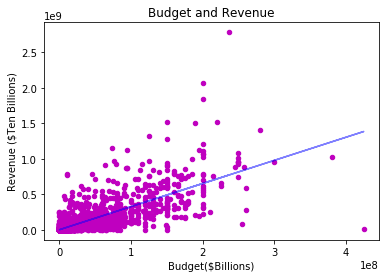

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2517.
Date:                Wed, 08 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:03:25   Log-Likelihood:                -40279.
No. Observations:                1992   AIC:                         8.056e+04
Df Residuals:                    1990   BIC:                         8.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.859e+06   3.97e+06      0.720      0.4

In [9]:
#explore the relationship between budget and revenue 
import seaborn as sns
from statsmodels.formula.api import ols
df3.plot(x='budget', y='revenue', kind='scatter', color='m');
x=np.array(df3['budget'])
y=np.array(df3['revenue'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', color='m')
plt.plot(x, m*x + b, '-', color='blue', alpha=.5)
plt.title('Budget and Revenue')
plt.xlabel('Budget($Billions)')
plt.ylabel('Revenue ($Ten Billions)')
plt.show()

model=ols('revenue~budget', df3).fit()
print(model.summary())

Counter({'Drama': 838, 'Comedy': 640, 'Thriller': 575, 'Action': 532, 'Adventure': 361, 'Science Fiction': 291, 'Romance': 291, 'Horror': 273, 'Crime': 262, 'Family': 233, 'Fantasy': 202, 'Animation': 170, 'Mystery': 148, 'Documentary': 93, 'Music': 72, 'History': 56, 'War': 44, 'Western': 20, 'TV Movie': 16, 'Foreign': 6})


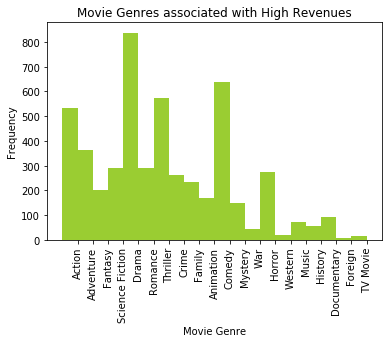

In [59]:
#relationship between revenue and movie genres 
gr_list = df3['genres'].tolist()
gr = [i.split(' ,') for i in gr_list]
gr_l=Counter(chain.from_iterable(gr))
print(Counter(chain.from_iterable(gr)))
labels, values = zip(*gr_l.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, color='yellowgreen')
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.title('Movie Genres associated with High Revenues')
plt.xlabel('Movie Genre')
plt.ylabel('Frequency')
plt.show()

In [61]:
#relationship between revenue and cast 
cast_list = df3['cast'].tolist()
cast = [i.split(' ,')[0] for i in cast_list]

print (Counter(cast))


Counter({'Tom Hanks': 14, 'Matt Damon': 14, 'Mark Wahlberg': 14, 'Nicolas Cage': 13, 'Johnny Depp': 12, 'Tom Cruise': 12, 'George Clooney': 11, 'Vin Diesel': 10, 'Christian Bale': 10, 'Steve Carell': 10, 'Hugh Jackman': 10, 'Ben Affleck': 10, 'Jeff Bridges': 10, 'Robert Downey Jr.': 9, 'Daniel Craig': 9, 'Brad Pitt': 9, 'Russell Crowe': 9, 'Adam Sandler': 9, 'Sylvester Stallone': 9, 'Ryan Reynolds': 9, 'Joseph Gordon-Levitt': 9, 'Daniel Radcliffe': 8, 'Liam Neeson': 8, 'Leonardo DiCaprio': 8, 'Kristen Stewart': 8, 'Will Smith': 8, 'Bradley Cooper': 8, 'Keanu Reeves': 8, 'Bruce Willis': 8, 'Sean Connery': 8, 'Colin Farrell': 8, 'Jason Statham': 8, 'Jack Black': 7, 'Dwayne Johnson': 7, 'Arnold Schwarzenegger': 7, 'Pierce Brosnan': 7, 'James McAvoy': 7, 'Will Ferrell': 7, 'Roger Moore': 7, 'Kurt Russell': 7, 'Samuel L. Jackson': 7, 'Harrison Ford': 6, 'Sandra Bullock': 6, 'Shia LaBeouf': 6, 'Elijah Wood': 6, 'Mia Wasikowska': 6, 'Mike Myers': 6, 'Ewan McGregor': 6, 'Matthew McConaughey': 

In [74]:
#revenue and directors 
df4=df3.loc[:, ['revenue', 'director']]
df4=df4.sort_values(['revenue'], ascending=False)
df4.head(5)
d_list = df4['director'].tolist()
print (Counter(d_list))

Counter({'John Carpenter': 17, 'Steven Spielberg': 11, 'Steven Soderbergh': 11, 'Peter Jackson': 8, 'Ridley Scott': 8, 'Clint Eastwood': 8, 'Robert Zemeckis': 8, 'Christopher Nolan': 7, 'Ron Howard': 7, 'Martin Scorsese': 7, 'David Fincher': 7, 'Paul W.S. Anderson': 7, 'Michael Bay': 6, 'Francis Lawrence': 6, 'Quentin Tarantino': 6, 'Francis Ford Coppola': 6, 'James Wan': 5, 'Gore Verbinski': 5, 'Tim Burton': 5, 'Chris Columbus': 5, 'George Lucas': 5, 'Sam Raimi': 5, 'Zack Snyder': 5, 'Peter Berg': 5, 'Martin Campbell': 5, 'Marc Forster': 5, 'Guy Ritchie': 5, 'Darren Aronofsky': 5, 'Dennis Dugan': 5, 'Rob Reiner': 5, 'F. Gary Gray': 5, 'John Glen': 5, 'Guy Hamilton': 5, 'Brian Robbins': 5, 'Rob Zombie': 5, 'Kevin Smith': 5, 'James Cameron': 4, 'David Yates': 4, 'Mike Newell': 4, 'Justin Lin': 4, 'Jon Favreau': 4, 'Phil Lord,Christopher Miller': 4, 'Todd Phillips': 4, 'Paul Greengrass': 4, 'James Mangold': 4, 'Shawn Levy': 4, 'Guillermo del Toro': 4, 'Doug Liman': 4, 'Bobby Farrelly,Pet

In [75]:
#revenue and movie keywords 
df5=df3.loc[:, ['revenue', 'keywords']]
df5=df5.sort_values(['revenue'], ascending=False)
k_list=df5['keywords'].tolist()
k = [i.split(' ,')[0] for i in k_list]
print(Counter(k))


Counter({'based on novel': 47, 'london': 30, 'suicide': 30, 'sex': 25, 'new york': 23, 'paris': 23, 'female nudity': 21, 'saving the world': 20, 'independent film': 18, 'corruption': 17, 'prison': 16, 'father-son relationship': 16, 'biography': 16, 'witch': 15, 'sport': 14, 'dancing': 13, 'gay': 13, 'dc comics': 12, 'dystopia': 12, 'california': 12, 'woman director': 12, 'monster': 11, 'cia': 11, 'male nudity': 11, 'terrorist': 10, 'spy': 10, 'brother brother relationship': 10, 'holiday': 10, 'rape': 10, 'alcohol': 10, 'car race': 9, 'individual': 9, 'assassin': 9, 'musical': 9, 'world war ii': 9, 'detective': 8, 'jealousy': 8, 'duringcreditsstinger': 8, 'sheriff': 8, 'beach': 8, 'robbery': 8, 'marvel comic': 7, 'vampire': 7, 'martial arts': 7, 'friendship': 7, 'artificial intelligence': 7, 'england': 7, 'gambling': 7, 'competition': 7, 'bomb': 7, 'secret': 7, 'high school': 7, 'baby': 7, 'prostitute': 7, 'moon': 6, 'ocean': 6, 'dream': 6, '1970s': 6, 'secret identity': 6, 'italy': 6, 

Counter({9: 290, 10: 201, 12: 175, 5: 158, 6: 157, 7: 153, 8: 153, 3: 151, 1: 149, 11: 146, 4: 137, 2: 122})


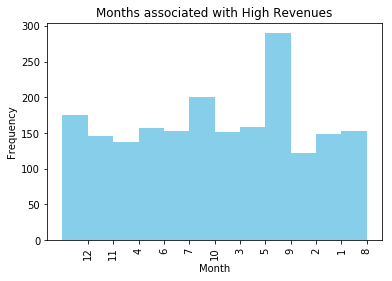

In [62]:
#revenue and release_date
import datetime
df6=df.loc[:, ['revenue', 'release_date']]
df6=df6.sort_values(['revenue'], ascending=False)
df6['month']= pd.DatetimeIndex(df6['release_date']).month
month=Counter(df6['month'])
print(Counter(df6['month']))

labels, values = zip(*month.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, color='skyblue')
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.title('Months associated with High Revenues')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

### Research Question 3: What is the relationship between user rating and revenue or popularity?
Reasoning for the analysis: To understand how user rating can impact the revenue of a movie since now movie fans tend to read movie reviews prior to watching movies. 

Observations: 
1. Does user rating predict popularity? 
Yes. The relationship between rating and popularity is positive. From the statistic analysis, p value =0, which indicates a strong association between rating and popularity. 
2. Does user rating predict revenue?
Yes. The relationship between rating and revenue is positive. From the statistic analysis, p value =0, which indicates 
a strong association between rating and revenue. 

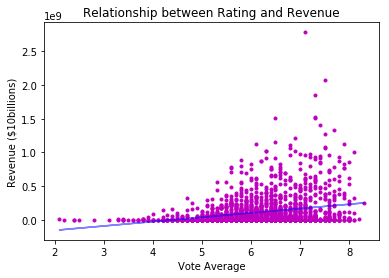

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 08 Nov 2017   Prob (F-statistic):           1.05e-31
Time:                        16:09:14   Log-Likelihood:                -41025.
No. Observations:                1992   AIC:                         8.205e+04
Df Residuals:                    1990   BIC:                         8.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.833e+08   3.38e+07     -8.390   

In [65]:
#subset dataframe with revenue, popularity, and user_rating 
from statsmodels.formula.api import ols
dfa = df.loc[:, ['revenue', 'vote_average']]
#explore the relationship between vote_average and revenue 
x=np.array(dfa['vote_average'])
y=np.array(dfa['revenue'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', color='m')
plt.plot(x, m*x + b, '-', color='blue', alpha=.5)
plt.title('Relationship between Rating and Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue ($10billions)')
plt.show()

model=ols('revenue~vote_average', dfa).fit()
print(model.summary())

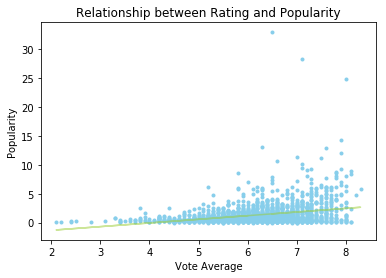

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 08 Nov 2017   Prob (F-statistic):           3.72e-42
Time:                        16:16:03   Log-Likelihood:                -3984.0
No. Observations:                1992   AIC:                             7972.
Df Residuals:                    1990   BIC:                             7983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5955      0.284     -9.149   

In [69]:
#explore the relationship between vote_average and popularity
import numpy as np
dfb=df.loc[:,['vote_average', 'popularity']]
x=np.array(dfb['vote_average'])
y=np.array(dfb['popularity'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', color='skyblue')
plt.plot(x, m*x + b, '-', color='yellowgreen', alpha=.5)

plt.title('Relationship between Rating and Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()

model=ols('popularity~vote_average', dfb).fit()
print(model.summary())

### Research Question 4: What kinds of properties are associated with movies that are most popular?
Reasoning for the analysis: To provide a checklist for the movie industry for making a popular movie. 

Observation: 
1. Cast?
These casts are correlated with higher popularity of a movie (in descending order): Tom Hanks, Matt Damon, Mark Wahlberg, Nicolas Cage, Johnny Depp, Tom Cruise, George Clooney
2. Director?
These directors' movie are correlated with popular movies (in descending order): John Carpenter, Steven Spielberg, Steven Soderbergh 
3. Production companies?
Production companies do not seem to correlate with the popularity of a movie. 
4. Release time? 
The release month does not seem to correlate with the popularity of a movie. 
5. Genres? 
The most popular movies correlate with these following genres (in descending order): adventure, science fiction and action. 
6. Keywords? 
The keywords of a movie do not seem to correlate with the popularity of a movie. 

In [71]:
#Subset the dataframe to only include columns of interest
dfp=df.loc[:, ['popularity', 'cast', 'director', 'production_companies', 'release_date', 'keywords', 'genres', 'release_year']]
#sort dataframe by popularity and remove values if popularity equal or smaller than 10
dfp=dfp.sort_values(['popularity'], ascending=False).drop(dfp[dfp['popularity'] <= 10].index)
dfp.head(2)

,popularity,cast,director,production_companies,release_date,keywords,genres,release_year
0,32.985763,"Chris Pratt ,Bryce Dallas Howard ,Irrfan Khan ...",Colin Trevorrow,"Universal Studios ,Amblin Entertainment ,Legen...",2015-06-09,"monster ,dna ,tyrannosaurus rex ,velociraptor ...","Action ,Adventure ,Science Fiction ,Thriller",2015
1,28.419936,"Tom Hardy ,Charlize Theron ,Hugh Keays-Byrne ,...",George Miller,"Village Roadshow Pictures ,Kennedy Miller Prod...",2015-05-13,"future ,chase ,post-apocalyptic ,dystopia ,aus...","Action ,Adventure ,Science Fiction ,Thriller",2015


In [72]:
#Explore the relationship between popularity and cast
c_list = dfp['cast'].tolist()
c = [i.split(' ,')[0] for i in cast_list]
print (Counter(c))

Counter({'Tom Hanks': 14, 'Matt Damon': 14, 'Mark Wahlberg': 14, 'Nicolas Cage': 13, 'Johnny Depp': 12, 'Tom Cruise': 12, 'George Clooney': 11, 'Vin Diesel': 10, 'Christian Bale': 10, 'Steve Carell': 10, 'Hugh Jackman': 10, 'Ben Affleck': 10, 'Jeff Bridges': 10, 'Robert Downey Jr.': 9, 'Daniel Craig': 9, 'Brad Pitt': 9, 'Russell Crowe': 9, 'Adam Sandler': 9, 'Sylvester Stallone': 9, 'Ryan Reynolds': 9, 'Joseph Gordon-Levitt': 9, 'Daniel Radcliffe': 8, 'Liam Neeson': 8, 'Leonardo DiCaprio': 8, 'Kristen Stewart': 8, 'Will Smith': 8, 'Bradley Cooper': 8, 'Keanu Reeves': 8, 'Bruce Willis': 8, 'Sean Connery': 8, 'Colin Farrell': 8, 'Jason Statham': 8, 'Jack Black': 7, 'Dwayne Johnson': 7, 'Arnold Schwarzenegger': 7, 'Pierce Brosnan': 7, 'James McAvoy': 7, 'Will Ferrell': 7, 'Roger Moore': 7, 'Kurt Russell': 7, 'Samuel L. Jackson': 7, 'Harrison Ford': 6, 'Sandra Bullock': 6, 'Shia LaBeouf': 6, 'Elijah Wood': 6, 'Mia Wasikowska': 6, 'Mike Myers': 6, 'Ewan McGregor': 6, 'Matthew McConaughey': 

In [76]:
#Explore the relationship between popularity and director 
d_list = df4['director'].tolist()
print (Counter(d_list))

Counter({'John Carpenter': 17, 'Steven Spielberg': 11, 'Steven Soderbergh': 11, 'Peter Jackson': 8, 'Ridley Scott': 8, 'Clint Eastwood': 8, 'Robert Zemeckis': 8, 'Christopher Nolan': 7, 'Ron Howard': 7, 'Martin Scorsese': 7, 'David Fincher': 7, 'Paul W.S. Anderson': 7, 'Michael Bay': 6, 'Francis Lawrence': 6, 'Quentin Tarantino': 6, 'Francis Ford Coppola': 6, 'James Wan': 5, 'Gore Verbinski': 5, 'Tim Burton': 5, 'Chris Columbus': 5, 'George Lucas': 5, 'Sam Raimi': 5, 'Zack Snyder': 5, 'Peter Berg': 5, 'Martin Campbell': 5, 'Marc Forster': 5, 'Guy Ritchie': 5, 'Darren Aronofsky': 5, 'Dennis Dugan': 5, 'Rob Reiner': 5, 'F. Gary Gray': 5, 'John Glen': 5, 'Guy Hamilton': 5, 'Brian Robbins': 5, 'Rob Zombie': 5, 'Kevin Smith': 5, 'James Cameron': 4, 'David Yates': 4, 'Mike Newell': 4, 'Justin Lin': 4, 'Jon Favreau': 4, 'Phil Lord,Christopher Miller': 4, 'Todd Phillips': 4, 'Paul Greengrass': 4, 'James Mangold': 4, 'Shawn Levy': 4, 'Guillermo del Toro': 4, 'Doug Liman': 4, 'Bobby Farrelly,Pet

In [77]:
#Explore the relationship between popularity and movie genres 
glist = dfp['genres'].tolist()
g = [i.split(' ,') for i in glist]
print(Counter(chain.from_iterable(g)))

Counter({'Adventure': 10, 'Science Fiction': 9, 'Action': 7, 'Thriller': 5, 'Fantasy': 2, 'Drama': 1})


Counter({3: 3, 11: 2, 12: 2, 6: 1, 5: 1, 7: 1, 10: 1})


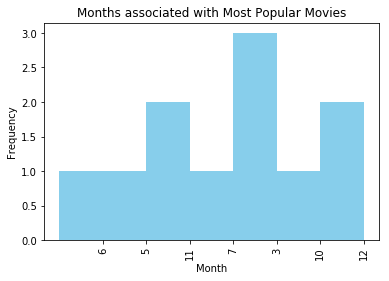

In [78]:
#Explore the relationship between popularity and release month 
import datetime
dfp['month']= pd.DatetimeIndex(dfp['release_date']).month
month=Counter(dfp['month'])
print(Counter(dfp['month']))

labels, values = zip(*month.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, color='skyblue')
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.title('Months associated with Most Popular Movies')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [79]:
#Explore the relationship between popularity and keywords 
klist=dfp['keywords'].tolist()
klist
kw= [i.split(' ,') for i in klist]
print(Counter(chain.from_iterable(kw)))


Counter({'dystopia': 3, 'future': 2, 'post-apocalyptic': 2, 'marvel comic': 2, 'spaceship': 2, 'sequel': 2, 'android': 2, 'monster': 1, 'dna': 1, 'tyrannosaurus rex': 1, 'velociraptor': 1, 'island': 1, 'chase': 1, 'australia': 1, 'saving the world': 1, 'artificial intelligence': 1, 'father-son relationship': 1, 'single parent': 1, 'nasa': 1, 'space': 1, 'scene during end credits': 1, 'outer space': 1, 'based on novel': 1, 'revolution': 1, 'dystopic future': 1, 'washington d.c.': 1, 'shield': 1, 'comic': 1, 'galaxy': 1, 'hermit': 1, 'death star': 1, 'lightsaber': 1, 'hitman': 1, 'revenge': 1, 'murder': 1, 'gangster': 1, 'dog': 1, 'jedi': 1, 'space opera': 1, '3d': 1, 'resistance': 1, 'war': 1, 'corruption': 1, 'elves': 1, 'dwarves': 1, 'orcs': 1, 'middle-earth (tolkien)': 1})


In [80]:
#Explore the relationship between popularity and production companies 
pclist=dfp['production_companies'].tolist()
pclist
pc=[i.split(' ,') for i in pclist]
pc
print(Counter(chain.from_iterable(pc)))

Counter({'Legendary Pictures': 2, 'Warner Bros.': 2, 'Marvel Studios': 2, 'Lucasfilm': 2, 'Universal Studios': 1, 'Amblin Entertainment': 1, 'Fuji Television Network': 1, 'Dentsu': 1, 'Village Roadshow Pictures': 1, 'Kennedy Miller Productions': 1, 'Paramount Pictures': 1, 'Syncopy': 1, 'Lynda Obst Productions': 1, 'Moving Picture Company (MPC)': 1, 'Bulletproof Cupid': 1, 'Revolution Sun Studios': 1, 'Summit Entertainment': 1, 'Mandeville Films': 1, 'Red Wagon Entertainment': 1, 'NeoReel': 1, 'Twentieth Century Fox Film Corporation': 1, 'Thunder Road Pictures': 1, '87Eleven': 1, 'DefyNite Films': 1, 'MJW Films': 1, 'Truenorth Productions': 1, 'Bad Robot': 1, 'Lionsgate': 1, 'Color Force': 1, 'WingNut Films': 1, 'New Line Cinema': 1, '3Foot7': 1, 'Metro-Goldwyn-Mayer (MGM)': 1})


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

<a id='conclusions'></a>
## Conclusions

> The movie with highest popularity of all time (from 1961 to 2015) was Jurassic World, with a popularity of 32.985763. Overtime, the most popular movie genre is Adventure followed by Action, and Drama.

> The amount of budget invested in a movie has a positive relationship with its revenue. 

> These following properties are found to be associated with high revenue: 

> --Movie genres that associated with high revenue (in descending order)are: drama, commedy, thriller, action, and adventure

> --Featured casts that could bring high revenues (in descending order): Tom Hanks, Matt Damon, Mark Wahlberg, Nicolas Cage, Johnny Depp, Tom Cruise, George Clooney

> --Directored by award-winning movie directors: John Carpenter, Steven Spielberg, Steven Soderbergh

> --Movie is based on novel could yield high revenues, as well as settings (in descending order) of the story are in London, New York and Paris. Interestingly, movie on suicide also yield high revenues second to based on novel.

> --Movies released in the fall (in descending order): September, October and December tend to yield high revenues

> One can predict the revenue and popularity of a movie based on user ratings on TMDB

> These following properties are associated with a popular movie:

> --Cast: These casts are correlated with higher popularity of a movie (in descending order): Tom Hanks, Matt Damon, Mark Wahlberg, Nicolas Cage, Johnny Depp, Tom Cruise, George Clooney

> --Director: These directors' movie are correlated with popular movies (in descending order): John Carpenter, Steven Spielberg, Steven Soderbergh

> --Genres? The most popular movies correlate with these following genres (in descending order): adventure, science fiction and action.

> These following properties do not seem to have an impact on the popularity of a movie:

> --Production companies: Production companies do not seem to correlate with the popularity of a movie.

> --Release time? The release month does not seem to correlate with the popularity of a movie.

> --Keywords? The keywords of a movie do not seem to correlate with the popularity of a movie.


<a id='Limitation'></a> 
## Limitations of Dataset

> The dataset only includes revenue generated in the US market, which could mean it may not be a true reflection of movies that were also on foreign markets

> The dataset did not include movide critiques vote on a movie, which could help understand whether there is a difference between the preferences of movie critiques and movie fans. 

<a id='Future Work'></a> 
## Future Work

> Future work is needed to collect data on voting and revenue of holywood movies gained from foreign markets. 

> Future work is also needed to collect award winning information of movies, so that to study whether or not a popular movie predict winning an award; also understand what properties are associated with award-winning movies 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])